# MBA SALARY DATA

In [13]:
import pandas as pd

file_path =r"C:\Users\adity\Downloads\MBA Salary - MBA Salary.csv"
data = pd.read_csv(file_path)
import matplotlib.pyplot as plt

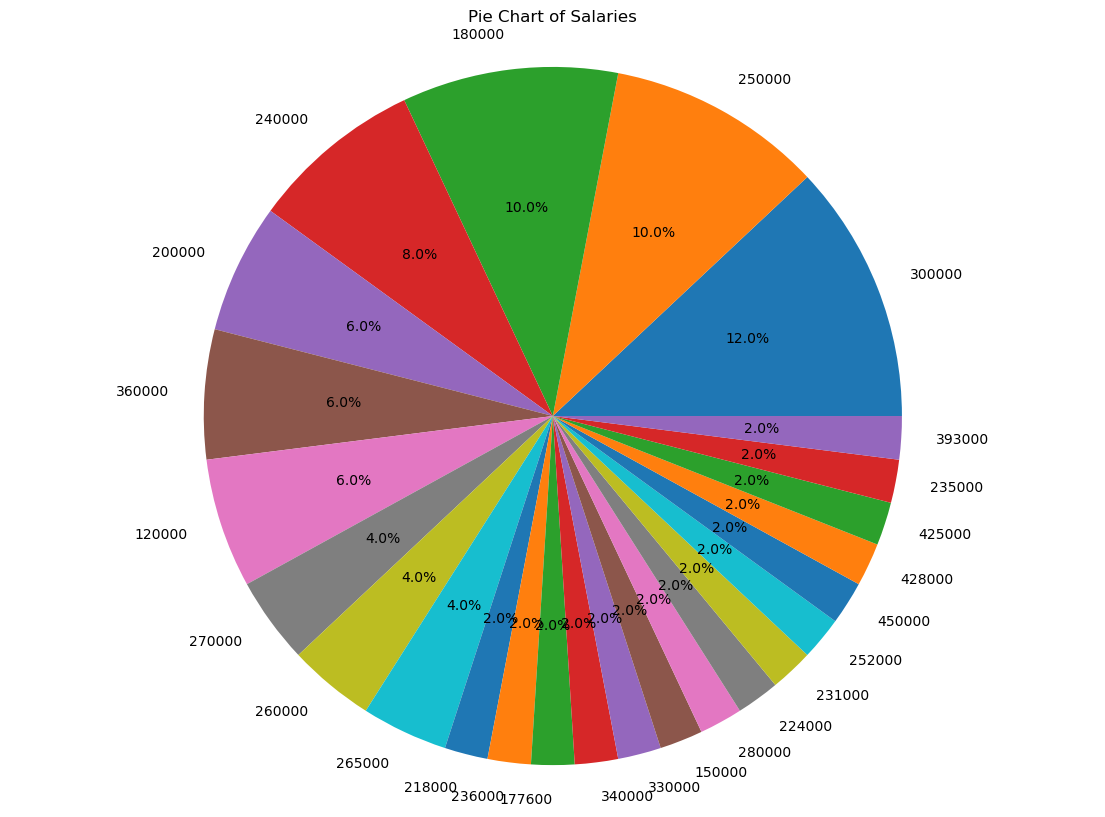

In [16]:
data = pd.read_csv(file_path)

# Pie Chart
plt.figure(figsize=(14, 10))
plt.pie(data['Salary'].value_counts(), labels=data['Salary'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of Salaries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

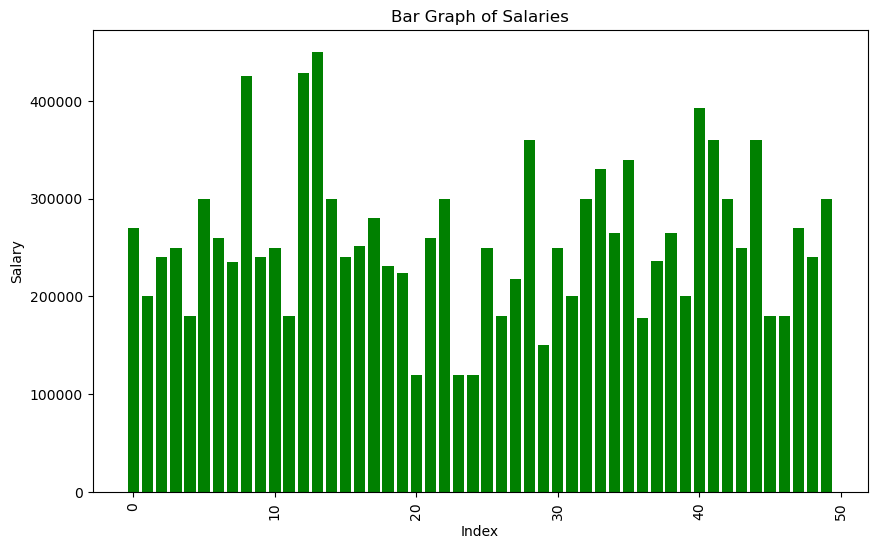

In [17]:
# Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['Salary'], color='green')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Bar Graph of Salaries')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [6]:
import statsmodels.api as sm
X = sm.add_constant(data['Percentage in Grade 10'])
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [7]:
Y = data['Salary']

In [8]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.8, random_state = 50)

In [9]:
data_lm = sm.OLS(train_Y, train_X).fit()
data_lm

In [10]:
print(data_lm.params)

const                     89695.288347
Percentage in Grade 10     2638.255989
dtype: float64


In [11]:
data_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                   OLS                   Adj. R-squared:          0.097     
Dependent Variable:      Salary                AIC:                     1000.6210 
Date:                    2024-05-02 10:51      BIC:                     1003.9988 
No. Observations:        40                    Log-Likelihood:          -498.31   
Df Model:                1                     F-statistic:             5.195     
Df Residuals:            38                    Prob (F-statistic):      0.0284    
R-squared:               0.120                 Scale:                   4.0783e+09
----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------
const                  89695.2883 73934.8487 1.2132 0.2326 -59977.9880 239368.5647
Percentage in Grade 10  2638.2560  1157.5615 2.2791 0.0284    294.8953   4981.6167
----------------------------------------------------------------------------------
Omnibus:                     1.353             Durbin-Watson:                2.425
Prob(Omnibus):               0.508             Jarque-Bera (JB):             0.827
Skew:                        0.350             Prob(JB):                     0.661
Kurtosis:                    3.081             Condition No.:                468  
==================================================================================

"""

### HYPOTHESIS
H0: $\beta$ = 0 (There is no relationship between salary and grade 10 marks)
<br>
Ha: $\beta$ = !0 (There is reLationship between salary and grade 10 marks)
<br>
<br>
p-value for percentage in grade = 0.0284
<br>
RULE => p < $\alpha$ , Reject Null Hypothesis
<br>
0.028 < 0.05 - Thus, Reject H0
<br>
Therefore, There is relationship between X and Y ( $\beta$ = !0 ).

#### MAKING PREDICTIONS USING THE MODEL

In [23]:
pred_Y = data_lm.predict(test_X)

#### RESIDUAL ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from scipy import stats
data_resid = data_lm.resid

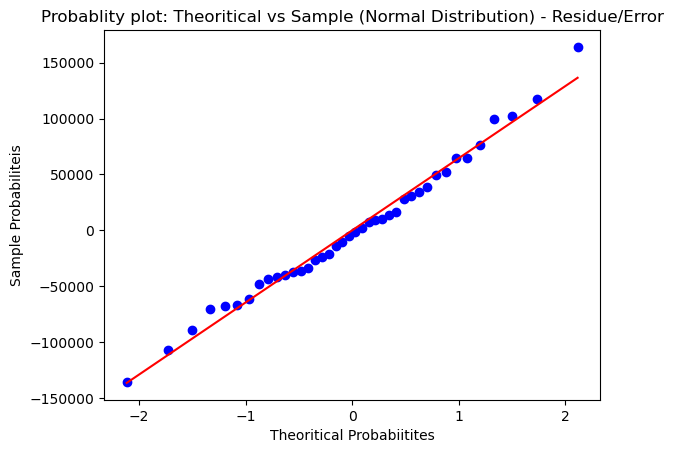

In [29]:
stats.probplot(data_resid, dist = "norm", plot = plt)

plt.title("Probablity plot: Theoritical vs Sample (Normal Distribution) - Residue/Error")
plt.xlabel("Theoritical Probabiitites")
plt.ylabel("Sample Probabiliteis")

plt.show()

#### TEST OF HOMOSCEDASTICITY

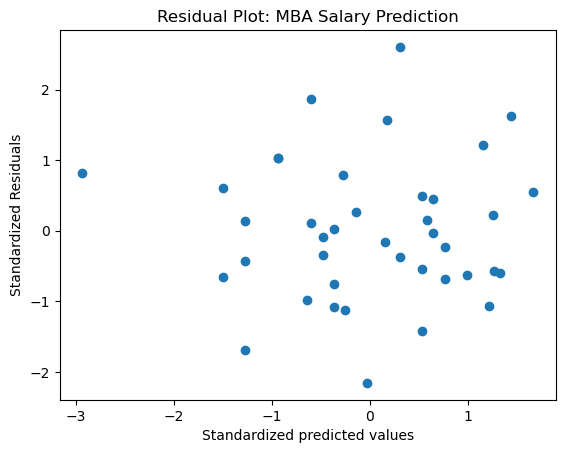

In [30]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(data_lm.fittedvalues),
get_standardized_values(data_resid))
plt.title("Residual Plot: MBA Salary Prediction");
plt.xlabel("Standardized predicted values")
plt.ylabel("Standardized Residuals");

As there is no pattern seen in this plot, we can say that the variance of residue is constant and it has homoscadasticity and so no problem. Hence, we can go ahead with the model.

#### MAKING PREDICTIONS USING THE MODEL

In [33]:
pred_Ytrain = data_lm.predict(train_X)

In [34]:
pred_Ytest = data_lm.predict(test_X)

In [36]:
from tabulate import tabulate
# Combine predicted values with actual values for the trainning set 
train_data = list(zip(pred_Ytrain, train_Y))

# Combine predicted values with actual values for the test set 
test_data = list(zip(pred_Ytest, test_Y))

# Define the table headers for train and test sets
headers = ["Predicted", "Actual"]

# Print only the first 5 rows for train set
print("Actual train vs Predicted train:")
print(tabulate(train_data[:5], headers = headers))

# Print only the first 5 rows for test set
print("\nActual test vs Predicted test:")
print(tabulate(test_data[:5], headers = headers))

Actual train vs Predicted train:
  Predicted    Actual
-----------  --------
     274373    231000
     269097    180000
     263820    428000
     226885    120000
     260127    250000

Actual test vs Predicted test:
  Predicted    Actual
-----------  --------
     221819    265000
     269097    177600
     291073    200000
     232161    265000
     308143    425000


#### FINDING R-SQUARED AND RMSE

In [38]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
np.abs(r2_score(test_Y, pred_Y))

0.20126938589287624

In [39]:
import numpy as np
np.sqrt(mean_squared_error(test_Y, pred_Y))

94468.00882426449

The model's predictions for salaries based on marks have an average error of approximately 94,468.01. This means that, on an average, the predicted salries differ from the actual salaries by around 94,468.01